In [1]:
import pandas as pd
import numpy as np

from venn import venn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
RNA_DEG_7_75 = pd.read_excel(
    '../../RNA-seq/E7.75_FLAG-Lhx1_RNA_seq_gene_list.xlsx',
    sheet_name='List A protein-coding only')
RNA_DEG_7_75_up = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] > 0]
RNA_DEG_7_75_down = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] < 0]

RNA_DEG_9_5 = pd.read_excel(
    '../../RNA-seq/E9.5_FLAG-Lhx1_RNA-seq_gene_list.xlsx',
    sheet_name='List A')
RNA_DEG_9_5_up = RNA_DEG_9_5[RNA_DEG_9_5['WT_c3_Dox'] > 0]
RNA_DEG_9_5_down = RNA_DEG_9_5[RNA_DEG_9_5['WT_c3_Dox'] < 0]

ATAC_DEP_7_75_WT = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond1_annotated.txt',
    sep='\t')
ATAC_DEP_7_75_HOM = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond2_annotated.txt',
    sep='\t')
ATAC_DEP_7_75_WT = ATAC_DEP_7_75_WT[ATAC_DEP_7_75_WT['Annotation'].str.contains('exon|promoter', regex=True)]
ATAC_DEP_7_75_HOM = ATAC_DEP_7_75_HOM[ATAC_DEP_7_75_HOM['Annotation'].str.contains('exon|promoter', regex=True)]

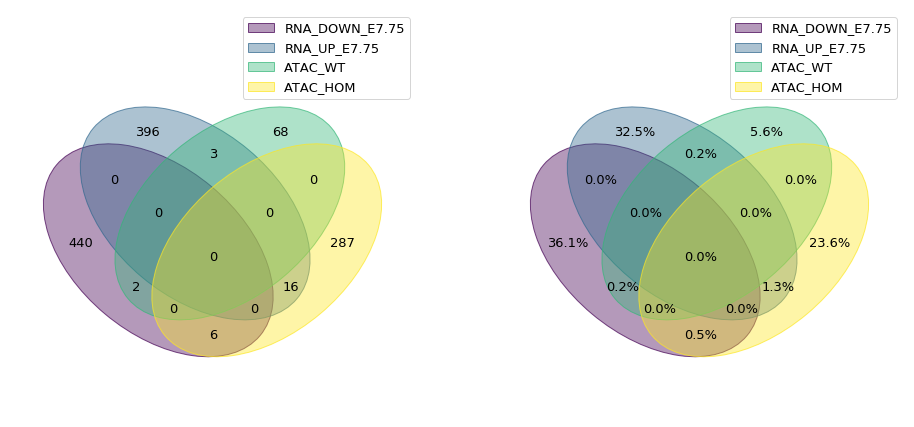

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_WT': set(ATAC_DEP_7_75_WT['Gene Name']),
    'ATAC_HOM': set(ATAC_DEP_7_75_HOM['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)

# the 16 - closed in WT but upregulated

In [14]:
close_but_up = ATAC_DEP_7_75_HOM[
    (ATAC_DEP_7_75_HOM['Gene Name'].isin(RNA_DEG_7_75_up['Gene name']))
    & (~ATAC_DEP_7_75_HOM['Gene Name'].isin(ATAC_DEP_7_75_WT['Gene Name']))]

In [18]:
close_but_up

,PeakID (cmd=annotatePeaks.pl diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond2_bed4.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
549,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_954,chr19,53142440,53142702,+,5.23315,NaN,promoter-TSS (NM_001277100),promoter-TSS (NM_001277100),-185,NM_001277100,27360,Mm.426080,NM_013758,ENSMUSG00000025026,Add3,AI463285|R75380,adducin 3 (gamma),protein-coding
741,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1521,chr6,36809912,36810136,+,4.85275,NaN,"5' UTR (NM_008973, exon 1 of 5)","5' UTR (NM_008973, exon 1 of 5)",155,NM_008973,19242,Mm.279690,NM_008973,ENSMUSG00000029838,Ptn,HARP|HB-GAM|HBBM|HBBN|HBGF-8|HBNF|OSF|Osf-1|Osf1,pleiotrophin,protein-coding
743,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1724,chr7,123499884,123500119,+,4.84799,NaN,"5' UTR (NM_001081329, exon 1 of 7)","5' UTR (NM_001081329, exon 1 of 7)",625,NM_001081329,210162,Mm.135397,NM_175435,ENSMUSG00000030757,Zkscan2,9430065N20Rik|AW493225|Zfp694,zinc finger with KRAB and SCAN domains 2,protein-coding
776,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1545,chr6,67037305,67037587,+,4.80131,NaN,promoter-TSS (NM_007836),promoter-TSS (NM_007836),-39,NM_007836,13197,Mm.72235,NM_007836,ENSMUSG00000036390,Gadd45a,AA545191|Ddit1|GADD45,growth arrest and DNA-damage-inducible 45 alpha,protein-coding
840,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1418,chr5,66996962,66997378,+,4.70269,NaN,"exon (NM_001256122, exon 5 of 21)","exon (NM_001256122, exon 5 of 21)",28754,NM_001256122,77569,Mm.374778,NM_001001980,ENSMUSG00000037736,Limch1,3732412D22Rik|mKIAA1102,LIM and calponin homology domains 1,protein-coding
925,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1871,chr9,39604018,39604311,+,4.57772,NaN,promoter-TSS (NM_178737),promoter-TSS (NM_178737),-40,NM_178737,244810,Mm.208855,NM_178737,ENSMUSG00000038112,AW551984,3222402N16,expressed sequence AW551984,protein-coding
988,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1136,chr3,8509326,8509667,+,4.48689,NaN,promoter-TSS (NM_025285),promoter-TSS (NM_025285),-31,NM_025285,20257,Mm.29580,NM_025285,ENSMUSG00000027500,Stmn2,AI159727|SCG10|Scgn10|Stmb2,stathmin-like 2,protein-coding
1070,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_581,chr14,16575251,16575609,+,4.37074,NaN,promoter-TSS (NM_011243),promoter-TSS (NM_011243),46,NM_011243,218772,Mm.259318,NM_011243,ENSMUSG00000017491,Rarb,A830025K23|Hap|Nr1b2,"retinoic acid receptor, beta",protein-coding
1274,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1141,chr3,14862898,14863355,+,4.13036,NaN,promoter-TSS (NM_007606),promoter-TSS (NM_007606),-412,NM_007606,12350,Mm.300,NM_007606,ENSMUSG00000027559,Car3,BB219044|Ca3|Car-3,carbonic anhydrase 3,protein-coding
1336,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_277,chr11,11116284,11116517,+,4.05616,NaN,"exon (NM_177033, exon 2 of 4)","exon (NM_177033, exon 2 of 4)",2384,NM_177033,319922,Mm.337851,NM_177033,ENSMUSG00000050830,Vwc2,A930041G11Rik|G11|PSST739|UNQ739|cradin,von Willebrand factor C domain containing 2,protein-coding


# the 3

In [19]:
open_and_up = ATAC_DEP_7_75_WT[
    (ATAC_DEP_7_75_WT['Gene Name'].isin(RNA_DEG_7_75_up['Gene name']))]

In [20]:
open_and_up

,PeakID (cmd=annotatePeaks.pl diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond1_bed4.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
128,diff_CTRL_E7.75_vs_MUT_E7.75_cond1_517,chr4,8690144,8690533,+,6.11733,NaN,promoter-TSS (NM_001277149),promoter-TSS (NM_001277149),-68,NM_001277149,320790.0,Mm.138792,NM_001033395,ENSMUSG00000041235,Chd7,A730019I05Rik|Cycn|Cyn|Dz|Edy|Flo|GENA 47|GENA...,chromodomain helicase DNA binding protein 7,protein-coding
454,diff_CTRL_E7.75_vs_MUT_E7.75_cond1_543,chr4,107253791,107253996,+,4.43362,NaN,promoter-TSS (NM_001355459),promoter-TSS (NM_001355459),-10,NM_001355459,72938.0,Mm.21787,NM_028394,ENSMUSG00000063172,Hspb11,2900042B11Rik|IFT25|PP25,"heat shock protein family B (small), member 11",protein-coding
687,diff_CTRL_E7.75_vs_MUT_E7.75_cond1_203,chr13,40731178,40731399,+,3.75834,NaN,promoter-TSS (NM_001122948),promoter-TSS (NM_001122948),-831,NM_001122948,21418.0,Mm.85544,NM_011547,ENSMUSG00000021359,Tfap2a,AP-2|AP2alpha|Ap-2 (a)|Ap2|Ap2tf|Tcfap2a,"transcription factor AP-2, alpha",protein-coding


# the 2

In [21]:
open_but_down = ATAC_DEP_7_75_WT[
    (ATAC_DEP_7_75_WT['Gene Name'].isin(RNA_DEG_7_75_down['Gene name']))]

In [22]:
open_but_down

,PeakID (cmd=annotatePeaks.pl diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond1_bed4.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
668,diff_CTRL_E7.75_vs_MUT_E7.75_cond1_126,chr11,69920683,69920918,+,3.82707,NaN,promoter-TSS (NM_001166590),promoter-TSS (NM_001166590),147,NM_001166594,276770.0,Mm.18026,NM_181582,ENSMUSG00000078812,Eif5a,AA410058|D19Wsu54e|Eif4d|Eif5a1|eIF-4D|eIF-5A|...,eukaryotic translation initiation factor 5A,protein-coding
674,diff_CTRL_E7.75_vs_MUT_E7.75_cond1_441,chr2,154791218,154791423,+,3.81590,NaN,"5' UTR (NM_001139511, exon 1 of 8)","5' UTR (NM_001139511, exon 1 of 8)",210,NM_001139511,19383.0,Mm.221440,NM_023130,ENSMUSG00000027593,Raly,AI663842|Merc,hnRNP-associated with lethal yellow,protein-coding


# the 6

In [23]:
close_and_down = ATAC_DEP_7_75_HOM[
    (ATAC_DEP_7_75_HOM['Gene Name'].isin(RNA_DEG_7_75_down['Gene name']))]

In [24]:
close_and_down

,PeakID (cmd=annotatePeaks.pl diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond2_bed4.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
227,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_275,chr11,9118385,9118668,+,6.27665,NaN,promoter-TSS (NM_001159402),promoter-TSS (NM_001159402),19,NM_001159402,22271,Mm.4610,NM_009477,ENSMUSG00000020407,Upp1,AI325217|UPase|UdRPase|Up|Upp,uridine phosphorylase 1,protein-coding
620,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_313,chr11,49794028,49794262,+,5.04630,NaN,promoter-TSS (NM_013529),promoter-TSS (NM_013529),-10,NM_013529,14584,Mm.24402,NM_013529,ENSMUSG00000020363,Gfpt2,AI480523|GFAT2,glutamine fructose-6-phosphate transaminase 2,protein-coding
1165,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_274,chr11,9117768,9117967,+,4.25909,NaN,promoter-TSS (NM_001159402),promoter-TSS (NM_001159402),-141,NM_001159401,22271,Mm.4610,NM_009477,ENSMUSG00000020407,Upp1,AI325217|UPase|UdRPase|Up|Upp,uridine phosphorylase 1,protein-coding
1284,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_956,chr19,55253883,55254100,+,4.11777,NaN,"5' UTR (NM_027976, exon 1 of 22)","5' UTR (NM_027976, exon 1 of 22)",622,NM_027976,433256,Mm.292056,NM_027976,ENSMUSG00000024981,Acsl5,1700030F05Rik|ACS2|ACS5|Facl5,acyl-CoA synthetase long-chain family member 5,protein-coding
1462,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_875,chr18,31447050,31447465,+,3.93520,NaN,"5' UTR (NM_009308, exon 1 of 4)","5' UTR (NM_009308, exon 1 of 4)",158,NM_009308,20983,Mm.233846,NM_009308,ENSMUSG00000024261,Syt4,SytIV,synaptotagmin IV,protein-coding
1777,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1070,chr2,130179529,130179748,+,3.55931,NaN,promoter-TSS (NM_009225),promoter-TSS (NM_009225),-274,NM_009225,20638,Mm.88216,NM_009225,ENSMUSG00000027404,Snrpb,AL024368|AU018828|SM-B|SM11|SMB|SNRNP-B,small nuclear ribonucleoprotein B,protein-coding
1961,diff_CTRL_E7.75_vs_MUT_E7.75_cond2_1737,chr7,139930818,139931070,+,3.29600,NaN,"exon (NM_177261, exon 24 of 31)","exon (NM_177261, exon 24 of 31)",-12912,NM_009482,22286,Mm.10205,NM_009482,ENSMUSG00000047751,Utf1,AI505934,undifferentiated embryonic cell transcription ...,protein-coding


# write to file

In [25]:
writer = pd.ExcelWriter('../../analysis_results/overlap_genes.xlsx', engine = 'xlsxwriter')

In [26]:
close_but_up.to_excel(writer, sheet_name = '16genes_close_but_up', index=False)
open_and_up.to_excel(writer, sheet_name = '3genes_open_and_up', index=False)
open_but_down.to_excel(writer, sheet_name = '2genes_open_but_down', index=False)
close_and_down.to_excel(writer, sheet_name = '6genes_close_and_down', index=False)

writer.save()
writer.close()